In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [23]:
# 데이터 로딩
url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/titanic.csv"
df = pd.read_csv(url)

In [24]:
# 데이터 확인
print("데이터 확인 (상위 5개 행 출력):")
print(df.head())  
print("\n열 이름 확인:")
print(df.columns)

데이터 확인 (상위 5개 행 출력):
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.050

In [25]:
# 결측치 확인 (변경 전)
print("\n결측치 확인 (변경 전):")
print(df.isnull().sum()) 


결측치 확인 (변경 전):
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [26]:
# 결측치 제거
mean_age = df['Age'].mean() # Age 컬럼의 평균값 계산 (결측치를 제외한 값으로 계산)
df['Age'] = df['Age'].fillna(mean_age) # Age 컬럼의 결측치를 평균값으로 채우기

In [27]:
# 결측치 확인 (Age 컬럼 변경 후)
print("\n결측치 확인 (변경 후):")
print(df.isnull().sum()) 


결측치 확인 (변경 후):
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64



imbalanced data 확인:


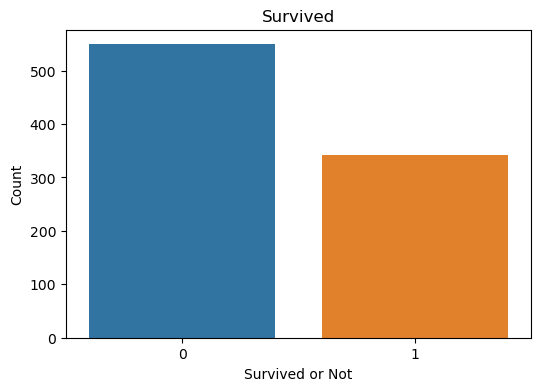

In [28]:
# 레이블 개수 확인(imbalanced data) - 그래프
print("\nimbalanced data 확인:")
plt.figure(figsize=(6, 4))  # 그래프 크기 설정

sns.countplot(data = df, x="Survived")
plt.xlabel("Survived or Not")
plt.ylabel("Count")
plt.title("Survived")
plt.show()

In [29]:
# 레이블 개수 확인(imbalanced data) - 숫자
print("\n레이블 개수 확인:")
print(df['Survived'].value_counts())
print("\n==================")
print(df['Sex'].value_counts())
print("\n==================")
print(df['Embarked'].value_counts())


레이블 개수 확인:
0    549
1    342
Name: Survived, dtype: int64

male      577
female    314
Name: Sex, dtype: int64

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [30]:
# 불필요한 컬럼 제거
columns_to_delete = ['Name', 'Ticket', 'Cabin'] # 삭제할 컬럼 리스트
df = df.drop(columns=columns_to_delete) # 컬럼 삭제

print("\n불필요한 컬럼 제거 후:")
print(df.columns) # 컬럼 삭제 확인


불필요한 컬럼 제거 후:
Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')


In [31]:
# 인코딩(숫자)
print("\n문자를 인코딩 후:")
label_encoder = LabelEncoder() # LabelEncoder 초기화
columns_to_encode = ['Sex', 'Embarked']  # 인코딩할 컬럼 리스트
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])
print(df)


문자를 인코딩 후:
     PassengerId  Survived  Pclass  Sex        Age  SibSp  Parch     Fare  \
0              1         0       3    1  22.000000      1      0   7.2500   
1              2         1       1    0  38.000000      1      0  71.2833   
2              3         1       3    0  26.000000      0      0   7.9250   
3              4         1       1    0  35.000000      1      0  53.1000   
4              5         0       3    1  35.000000      0      0   8.0500   
..           ...       ...     ...  ...        ...    ...    ...      ...   
886          887         0       2    1  27.000000      0      0  13.0000   
887          888         1       1    0  19.000000      0      0  30.0000   
888          889         0       3    0  29.699118      1      2  23.4500   
889          890         1       1    1  26.000000      0      0  30.0000   
890          891         0       3    1  32.000000      0      0   7.7500   

     Embarked  
0           2  
1           0  
2           2  

In [32]:
# 인코딩 변환 전/후 확인하여 인코딩이 어떻게 되었는지 확인
print("\n인코딩 후 컬럼 데이터 확인:")
print(df['Sex'].value_counts())  # male:1, female:0
print("\n==================")
print(df['Embarked'].value_counts()) # S:2, C:0, Q:1, NaN:3


인코딩 후 컬럼 데이터 확인:
1    577
0    314
Name: Sex, dtype: int64

2    644
0    168
1     77
3      2
Name: Embarked, dtype: int64


In [33]:
print("\n5가지 분류 (RF, DT, LR, SVM, KNN) 하고, accuracy 및 confusion matrix 확인")

# 입력(X)과 출력(y) 분리
X = df.drop(columns=['Survived'])  #df에서 'Survived' 컬럼을 제외한 나머지 컬럼들을 X에 저장
y = df['Survived']   #df에서 'Survived' 컬럼만 가져와서 y에 저장

# 데이터 분할 (훈련 80%, 테스트 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


5가지 분류 (RF, DT, LR, SVM, KNN) 하고, accuracy 및 confusion matrix 확인


In [34]:
# 1. 랜덤 포레스트 (Random Forest)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # 모델 생성 (100개의 트리 사용)
rf_model.fit(X_train, y_train)  # 학습
rf_pred = rf_model.predict(X_test)  # 예측
print("\n--- Random Forest Classifier ---")
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")  # 정확도 출력
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred))  # 혼동 행렬 출력


--- Random Forest Classifier ---
Accuracy: 0.8101
Confusion Matrix:
[[91 14]
 [20 54]]


In [35]:
# 2. 의사결정 나무 (Decision Tree)
dt_model = DecisionTreeClassifier(random_state=42)  
dt_model.fit(X_train, y_train)  # 학습
dt_pred = dt_model.predict(X_test)  # 예측
print("\n--- Decision Tree Classifier ---")
print(f"Accuracy: {accuracy_score(y_test, dt_pred):.4f}")  # 정확도 출력
print("Confusion Matrix:")
print(confusion_matrix(y_test, dt_pred))  # 혼동 행렬 출력


--- Decision Tree Classifier ---
Accuracy: 0.7598
Confusion Matrix:
[[84 21]
 [22 52]]


In [36]:
# 3. 로지스틱 회귀 (Logistic Regression)
lr_model = LogisticRegression(max_iter=200, random_state=42)  # 학습 횟수 200회 설정
lr_model.fit(X_train, y_train)  # 학습
lr_pred = lr_model.predict(X_test)  # 예측
print("\n--- Logistic Regression Classifier ---")
print(f"Accuracy: {accuracy_score(y_test, lr_pred):.4f}")  # 정확도 출력
print("Confusion Matrix:")
print(confusion_matrix(y_test, lr_pred))  # 혼동 행렬 출력


--- Logistic Regression Classifier ---
Accuracy: 0.8101
Confusion Matrix:
[[90 15]
 [19 55]]


In [37]:
# 4. 서포트 벡터 머신 (SVM)
svm_model = SVC(kernel='linear', random_state=42)  # 선형 커널 SVM 모델 생성
svm_model.fit(X_train, y_train)  # 학습
svm_pred = svm_model.predict(X_test)  # 예측
print("\n--- SVM Classifier ---")
print(f"Accuracy: {accuracy_score(y_test, svm_pred):.4f}")  # 정확도 출력
print("Confusion Matrix:")
print(confusion_matrix(y_test, svm_pred))  # 혼동 행렬 출력


--- SVM Classifier ---
Accuracy: 0.7821
Confusion Matrix:
[[88 17]
 [22 52]]


In [38]:
# 5. 최근접 이웃 (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)  # KNN 모델 생성
knn_model.fit(X_train, y_train)  # 학습
knn_pred = knn_model.predict(X_test)  # 예측
print("\n--- K-Nearest Neighbors Classifier ---")
print(f"Accuracy: {accuracy_score(y_test, knn_pred):.4f}")  # 정확도 출력
print("Confusion Matrix:")
print(confusion_matrix(y_test, knn_pred))  # 혼동 행렬 출력


--- K-Nearest Neighbors Classifier ---
Accuracy: 0.6592
Confusion Matrix:
[[89 16]
 [45 29]]


C:\Users\tjdus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
